In [3]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [4]:
face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
classifier =load_model('/content/model.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

--> Angry: 0.57%
--> Disgust: 0.05%
--> Fear: 0.67%
--> Happy: 96.76%
--> Neutral: 0.43%
--> Sad: 0.28%
--> Surprise: 1.24%


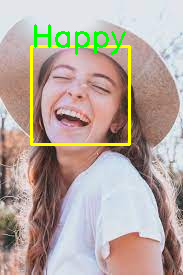

In [35]:
  cap = cv2.VideoCapture(0)



# frame = cv2.imread('/content/testdata/31ee72c875e41d4585542024c820c687.jpg')
# frame = cv2.imread('/content/testdata/Female_Emotions_732x549-thumbnail.jpg')
# frame = cv2.imread('/content/testdata/depositphotos_19353231-stock-photo-very-sad-man.jpg')
# frame = cv2.imread('/content/testdata/tumblr_inline_plfjp2KZNe1sq56mk_400.jpg')
frame = cv2.imread('/content/testdata/download.jpg')


labels = []
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



    if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0)

        prediction = classifier.predict(roi)[0]
        label=emotion_labels[prediction.argmax()]
        # print("Prediction is: ", emotion_labels)

        for (i, (emotion, prob)) in enumerate(zip(emotion_labels, prediction)):
            # construct the label text
            text = "{}: {:.2f}%".format(emotion, prob * 100)
            print("-->", text)

        label_position = (x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    else:
        cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
cv2_imshow(frame)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/depositphotos_19353231-stock-photo-very-sad-man.jpg')
cv2_imshow(image)